# Group 20 — Exploratory Data Analysis

This notebook performs exploratory data analysis on customer and flights databases, covering data inspection, quality assessment, and preprocessing.

## Table of Contents
- [Data Import](#data-import)
- [Data Inspection](#data-inspection)
  - [Customer DB](#customer-db)
  - [Flights DB](#flights-db)
- [Missing Values](#missing-values)
- [Outliers](#outliers)
  - [Customer DB Outliers](#customer-outliers)
  - [Flights DB Outliers](#flights-outliers)
- [Correlations](#correlations)
- [Miscellaneous Analyses](#miscellaneous)
  - [Categorical Distributions](#categorical-distributions)
  - [Relationship Analysis](#relationship-analysis)
  - [Points Redemption Analysis](#points-redemption)
  - [Geospatial Analysis](#geospatial-analysis)
- [Data Preprocessing](#preprocessing)

# <a id="data-import"></a> Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats

# Load the data

customer_db = pd.read_csv("data/DM_AIAI_CustomerDB.csv", index_col=0 )
flights_db = pd.read_csv("data/DM_AIAI_FlightsDB.csv")


# <a id="data-inspection"></a> Data Inspection

### <a id="customer-db"></a> Customer DB

## Basic Information

In [2]:
customer_db.head()

,Loyalty#,First Name,Last Name,Customer Name,Country,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType
0,480934,Cecilia,Householder,Cecilia Householder,Canada,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2/15/2019,NaN,3839.14,Standard
1,549612,Dayle,Menez,Dayle Menez,Canada,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,3/9/2019,NaN,3839.61,Standard
2,429460,Necole,Hannon,Necole Hannon,Canada,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,7/14/2017,1/8/2021,3839.75,Standard
3,608370,Queen,Hagee,Queen Hagee,Canada,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2/17/2016,NaN,3839.75,Standard
4,530508,Claire,Latting,Claire Latting,Canada,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,10/25/2017,NaN,3842.79,2021 Promotion


In [3]:
customer_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16921 entries, 0 to 19
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status           16921

In [4]:
# Check for duplicate loyalty IDs
duplicated_loyalty_ids = customer_db[customer_db['Loyalty#'].duplicated()]['Loyalty#'].unique()
print(f"Number of unique Duplicated Loyalty IDs: {len(duplicated_loyalty_ids)}")

Number of unique Duplicated Loyalty IDs: 163


## <a id="flights-db"></a> Flights DB

In [5]:
flights_db.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [6]:
flights_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


In [7]:
# Check for fractional flight counts
invalid_fractional_flights = flights_db[
    (flights_db['NumFlights'] % 1 != 0) |
    (flights_db['NumFlightsWithCompanions'] % 1 != 0)
]

print(f"Number of rows with fractional flight counts: {len(invalid_fractional_flights)}")
if not invalid_fractional_flights.empty:
    display(invalid_fractional_flights[['Year', 'Month', 'NumFlights', 'NumFlightsWithCompanions']].head(10))

Number of rows with fractional flight counts: 93055



,Year,Month,NumFlights,NumFlightsWithCompanions
405624,2019,1,2.7,0.0
405625,2019,1,9.0,3.6
405626,2019,1,5.4,0.0
405632,2019,1,5.4,0.0
405634,2019,1,2.7,0.0
405635,2019,1,9.0,1.8
405640,2019,1,9.9,0.0
405642,2019,1,7.2,3.6
405643,2019,1,8.1,0.9
405644,2019,1,5.4,5.4


In [8]:
# Check for inconsistent flight records (NumFlights=0 but DistanceKM>0)
invalid_flights = flights_db[(flights_db['NumFlights'] == 0) & (flights_db['DistanceKM'] > 0)]

print(f"Number of inconsistent rows (NumFlights=0 & DistanceKM>0): {len(invalid_flights)}")
if not invalid_flights.empty:
    display(invalid_flights.head())

Number of inconsistent rows (NumFlights=0 & DistanceKM>0): 5901


,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
19,261109,2021,12,12/1/2021,0.0,0.0,13736.0,1373.0,0.0,0.0
93,817609,2021,12,12/1/2021,0.0,0.0,23775.0,2377.0,0.0,0.0
96,192600,2021,12,12/1/2021,0.0,0.0,5119.0,511.0,0.0,0.0
116,883242,2021,12,12/1/2021,0.0,0.0,20681.0,2068.0,0.0,0.0
154,493800,2021,12,12/1/2021,0.0,0.0,17502.0,1750.0,0.0,0.0


# <a id="missing-values"></a> Missing Values Analysis

In [9]:
def missing_report(df: pd.DataFrame) -> pd.DataFrame:
    out = df.isna().agg(['sum', 'mean']).T
    out.columns = ['Total', 'Percentage']
    out['Percentage'] = (out['Percentage'] * 100).round(2)
    return out.sort_values(['Total', 'Percentage'], ascending=False)

In [10]:
print("Customer DB Missing Values:")
customer_missing = missing_report(customer_db)
customer_missing

Customer DB Missing Values:


,Total,Percentage
CancellationDate,14611.0,86.35
Income,20.0,0.12
Customer Lifetime Value,20.0,0.12
Loyalty#,0.0,0.00
First Name,0.0,0.00
Last Name,0.0,0.00
Customer Name,0.0,0.00
Country,0.0,0.00
Province or State,0.0,0.00
City,0.0,0.00


In [11]:
print("Flights DB Missing Values:")
flights_missing = missing_report(flights_db)
flights_missing

Flights DB Missing Values:


,Total,Percentage
Loyalty#,0.0,0.0
Year,0.0,0.0
Month,0.0,0.0
YearMonthDate,0.0,0.0
NumFlights,0.0,0.0
NumFlightsWithCompanions,0.0,0.0
DistanceKM,0.0,0.0
PointsAccumulated,0.0,0.0
PointsRedeemed,0.0,0.0
DollarCostPointsRedeemed,0.0,0.0


## Conclusion

**Customer DB:** CancellationDate has 86% missing values (expected for active customers). Income and Customer Lifetime Value have minimal missing data (0.12%). All other columns are complete.

**Flights DB:** No missing values detected. Dataset has excellent completeness.

# <a id="outliers"></a> Outliers Analysis

## <a id="customer-outliers"></a> Customer DB Outliers

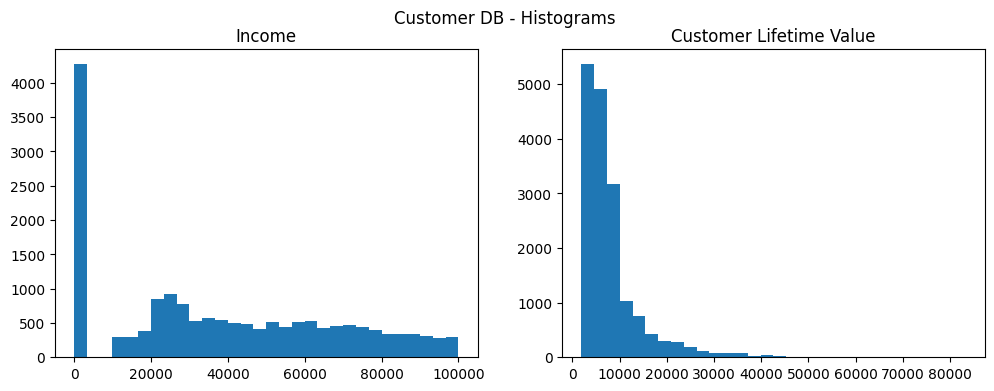

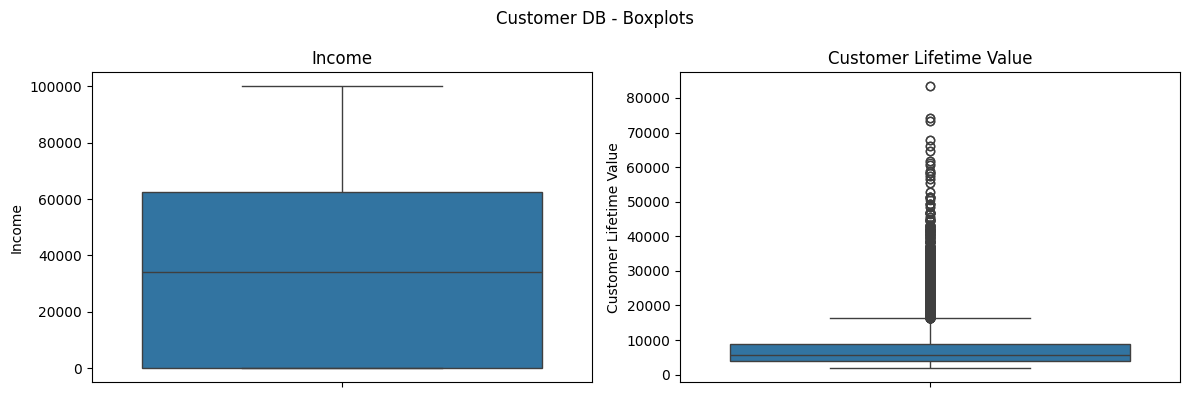

In [12]:
numeric_features = ["Income", "Customer Lifetime Value"]

# Histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, feat in zip(axes.flatten(), numeric_features):
    ax.hist(customer_db[feat].dropna(), bins=30)
    ax.set_title(feat)
plt.suptitle("Customer DB - Histograms")
plt.show()

# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(data=customer_db, y=feat, ax=ax)
    ax.set_title(feat)
plt.suptitle("Customer DB - Boxplots")
plt.tight_layout()
plt.show()

## <a id="flights-outliers"></a> Flights DB Outliers

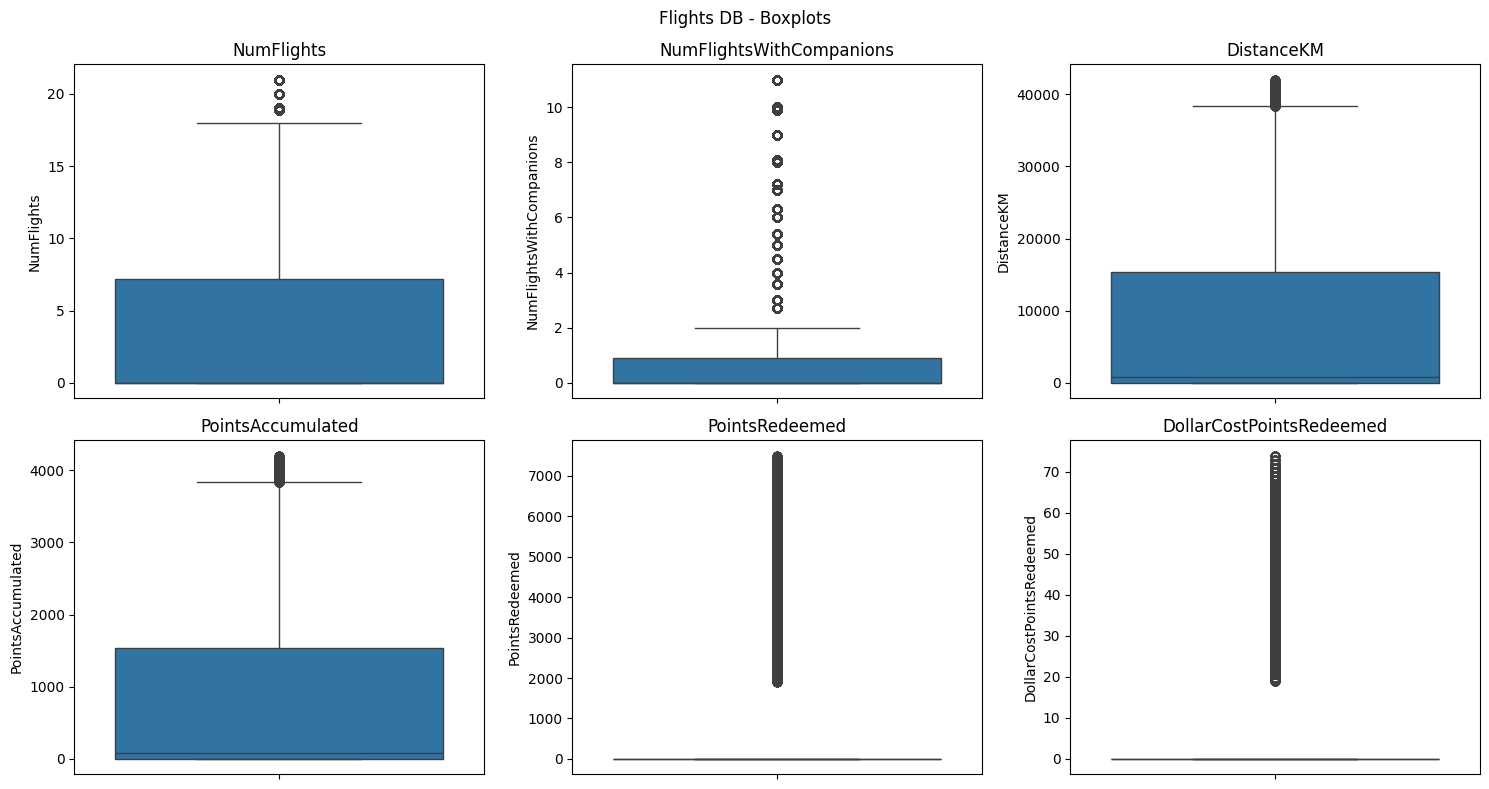

In [13]:
numeric_features = ["NumFlights", "NumFlightsWithCompanions", "DistanceKM", 
                    "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(data=flights_db, y=feat, ax=ax)
    ax.set_title(feat)
plt.suptitle("Flights DB - Boxplots")
plt.tight_layout()
plt.show()

## Conclusion

**Customer DB:** Both Income and Customer Lifetime Value show right-skewed distributions with numerous outliers. Many customers have zero or near-zero income (likely students), while a small segment has very high income.

**Flights DB:** All flight-related metrics exhibit right skewness with outliers representing highly active frequent flyers. These outliers are legitimate and represent valuable customers rather than data errors.

# <a id="correlations"></a> Correlations Analysis

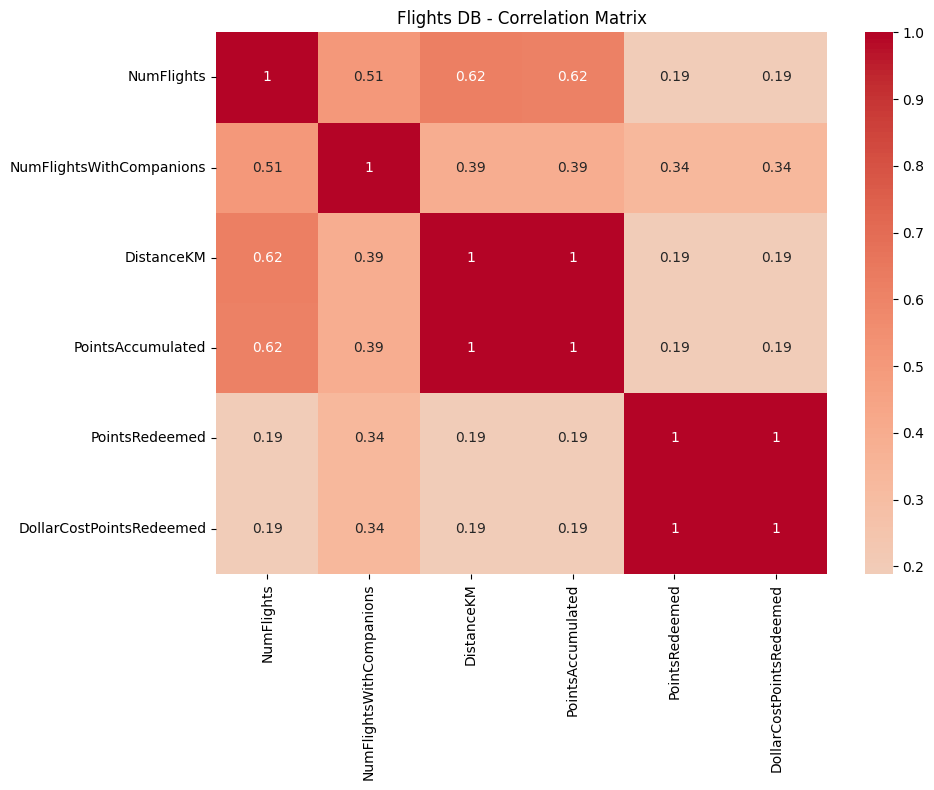

In [14]:
numeric_features = ["NumFlights", "NumFlightsWithCompanions", "DistanceKM", 
                    "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

corr = flights_db[numeric_features].corr(method="pearson")

fig = plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', center=0)
plt.title("Flights DB - Correlation Matrix")
plt.tight_layout()
plt.show()

## Conclusion

| Pair | Correlation | Interpretation |
|------|--------------|----------------|
| NumFlights and DistanceKM | 0.62 | Strong positive — more flights generally means more total distance flown. |
| NumFlights and PointsAccumulated | 0.62 | Strong positive — more flights results in more points earned. |
| NumFlights and NumFlightsWithCompanions | 0.51 | Moderate positive — people who fly often also tend to fly with companions more. |
| NumFlightsWithCompanions and DistanceKM | 0.39 | Moderate — more companion flights slightly increase total distance. |
| PointsRedeemed and DollarCostPointsRedeemed | 1.00 | Perfect correlation — these two represent the same underlying concept (points redeemed vs. their dollar cost).
| PointsRedeemed and NumFlights / DistanceKM / PointsAccumulated | 0.19–0.34 | Weak relationships — redeeming points doesn’t strongly depend on flying behavior in this dataset. |

# <a id="miscellaneous"></a> Miscellaneous Analyses

## <a id="categorical-distributions"></a> Categorical Distributions

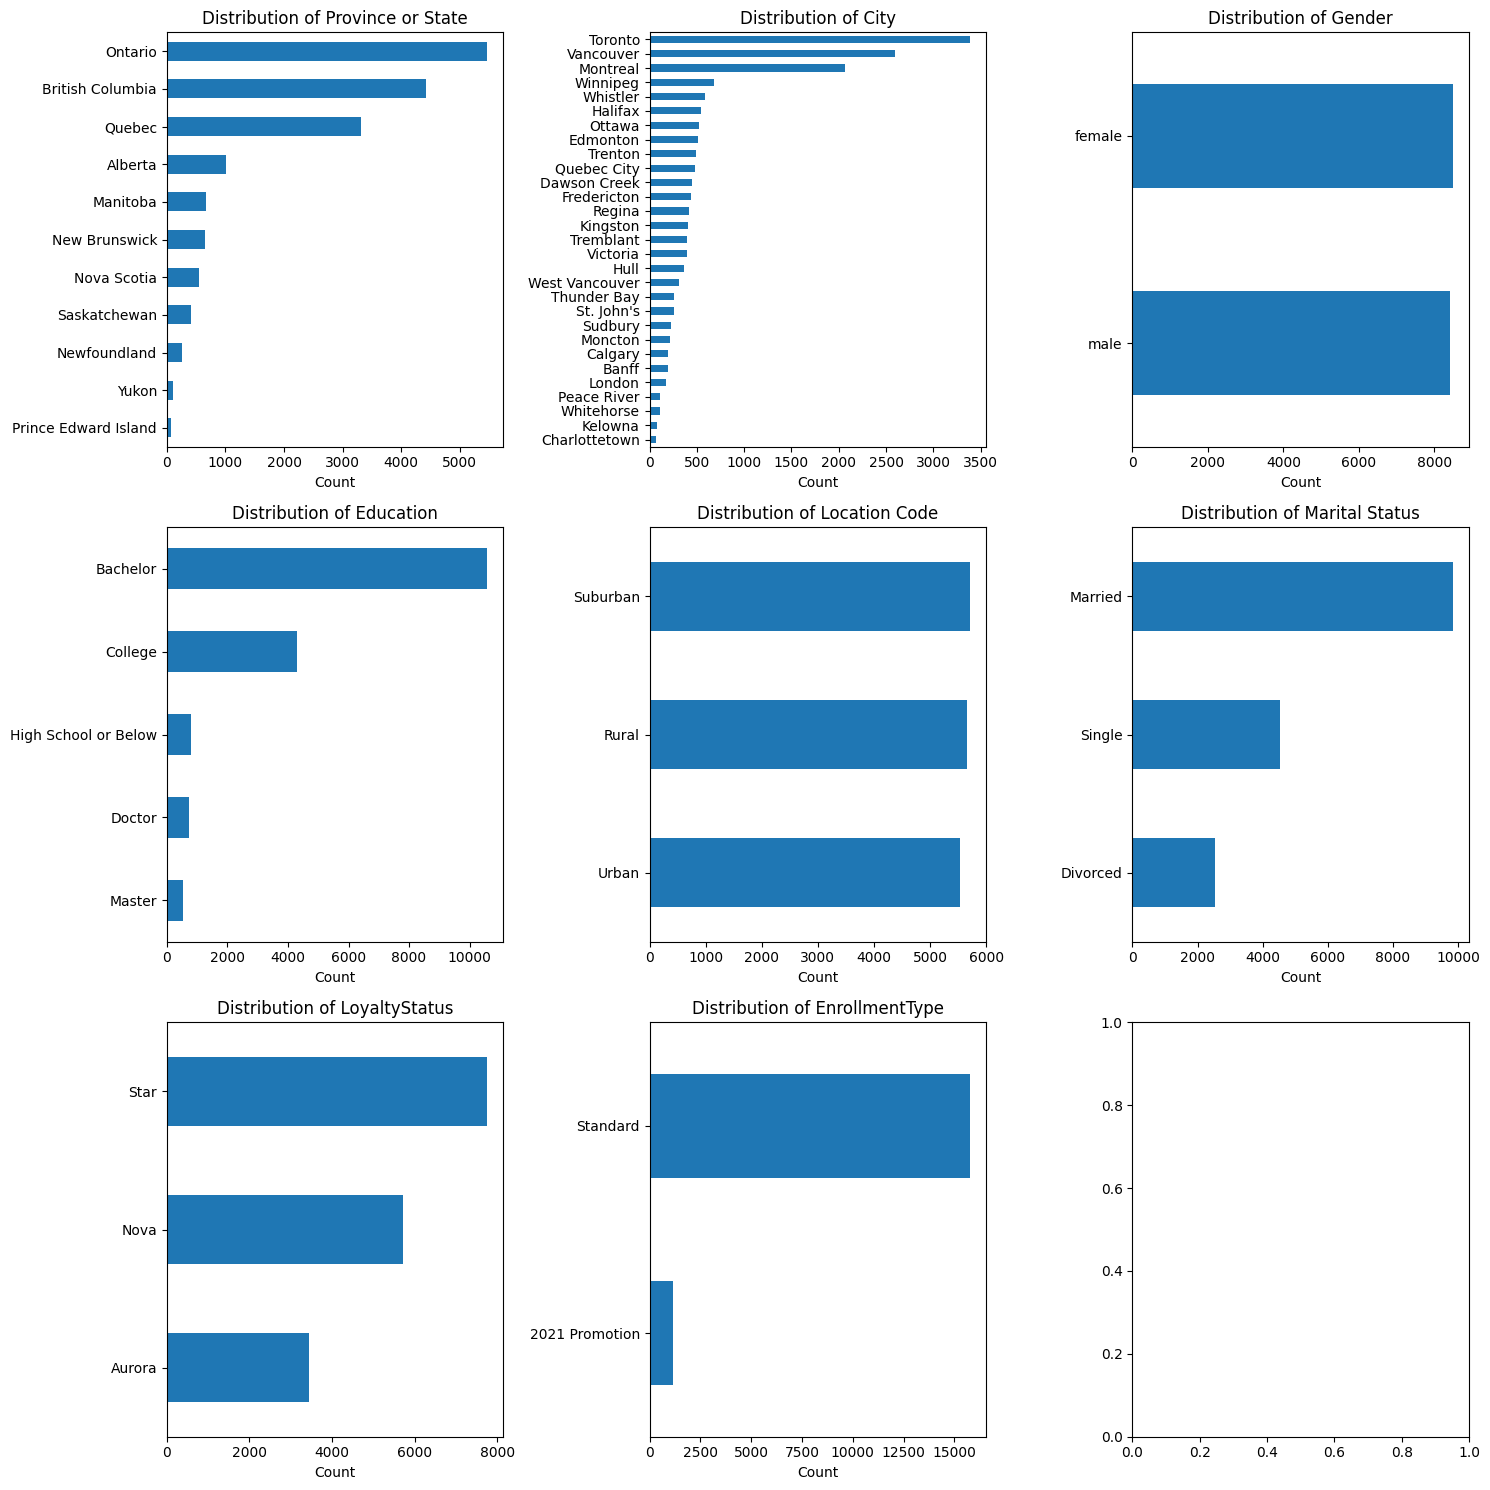

In [15]:
categorical_cols = ['Province or State', 'City', 'Gender', 'Education',
                    'Location Code', 'Marital Status', 'LoyaltyStatus', 'EnrollmentType']

fig, axes = plt.subplots(nrows=math.ceil(len(categorical_cols) / 3), ncols=3, figsize=(15, 15))

for ax, col in zip(axes.flatten(), categorical_cols):
    customer_db[col].value_counts().plot(kind='barh', ax=ax, title=f'Distribution of {col}')
    ax.set_xlabel("Count")
    ax.set_ylabel("")
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

## <a id="relationship-analysis"></a> Relationship Analysis

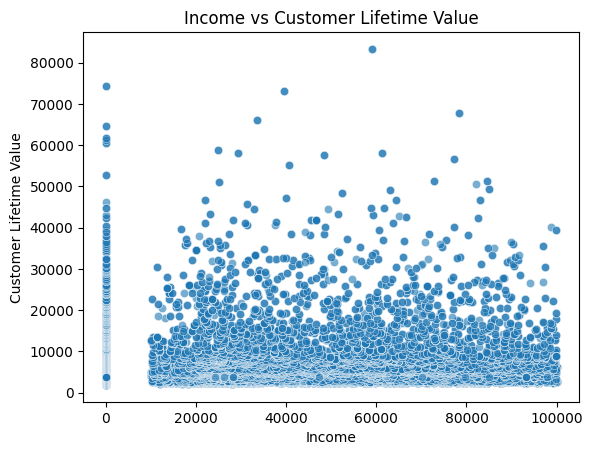

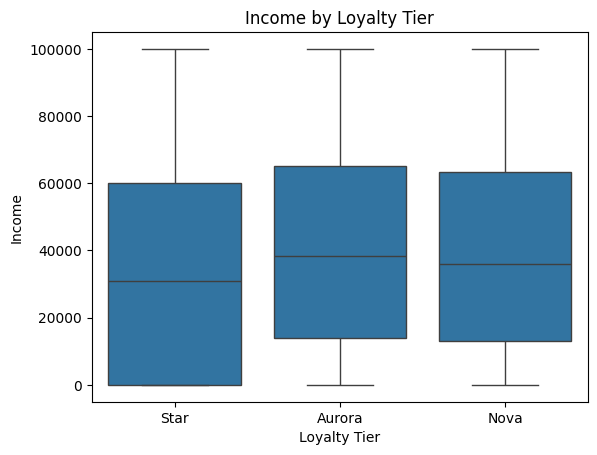

,count,mean,median
LoyaltyStatus,,,
Aurora,3438,40207.368528,38433.5
Nova,5722,38934.271409,36091.0
Star,7741,35800.771606,30817.0


In [16]:
# Customer DB: Income vs Customer Lifetime Value
sns.scatterplot(data=customer_db, x='Income', y='Customer Lifetime Value', alpha=0.6)
plt.title('Income vs Customer Lifetime Value')
plt.show()

# Income by Loyalty Status
sns.boxplot(x='LoyaltyStatus', y='Income', data=customer_db.dropna(subset=['Income']))
plt.title('Income by Loyalty Tier')
plt.xlabel('Loyalty Tier')
plt.ylabel('Income')
plt.show()

# Income statistics by Loyalty Status
customer_db.groupby('LoyaltyStatus')['Income'].agg(['count', 'mean', 'median'])

**Income vs CLV:** Weak relationship indicates that customer value is driven by factors beyond income, such as travel frequency and engagement with loyalty programs.

**Income by Loyalty Status:** Income distribution appears similar across loyalty tiers, suggesting the program is accessible to all income levels.

In [17]:
# ANOVA test: Income vs Education
groups = [group["Income"].dropna() for _, group in customer_db.groupby("Education")]
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 8453.611, p-value: 0.0000


**ANOVA Result:** Tests whether income differs significantly across education levels (Bachelor, College, etc.). A low p-value (<0.05) would indicate significant differences in income by education level.

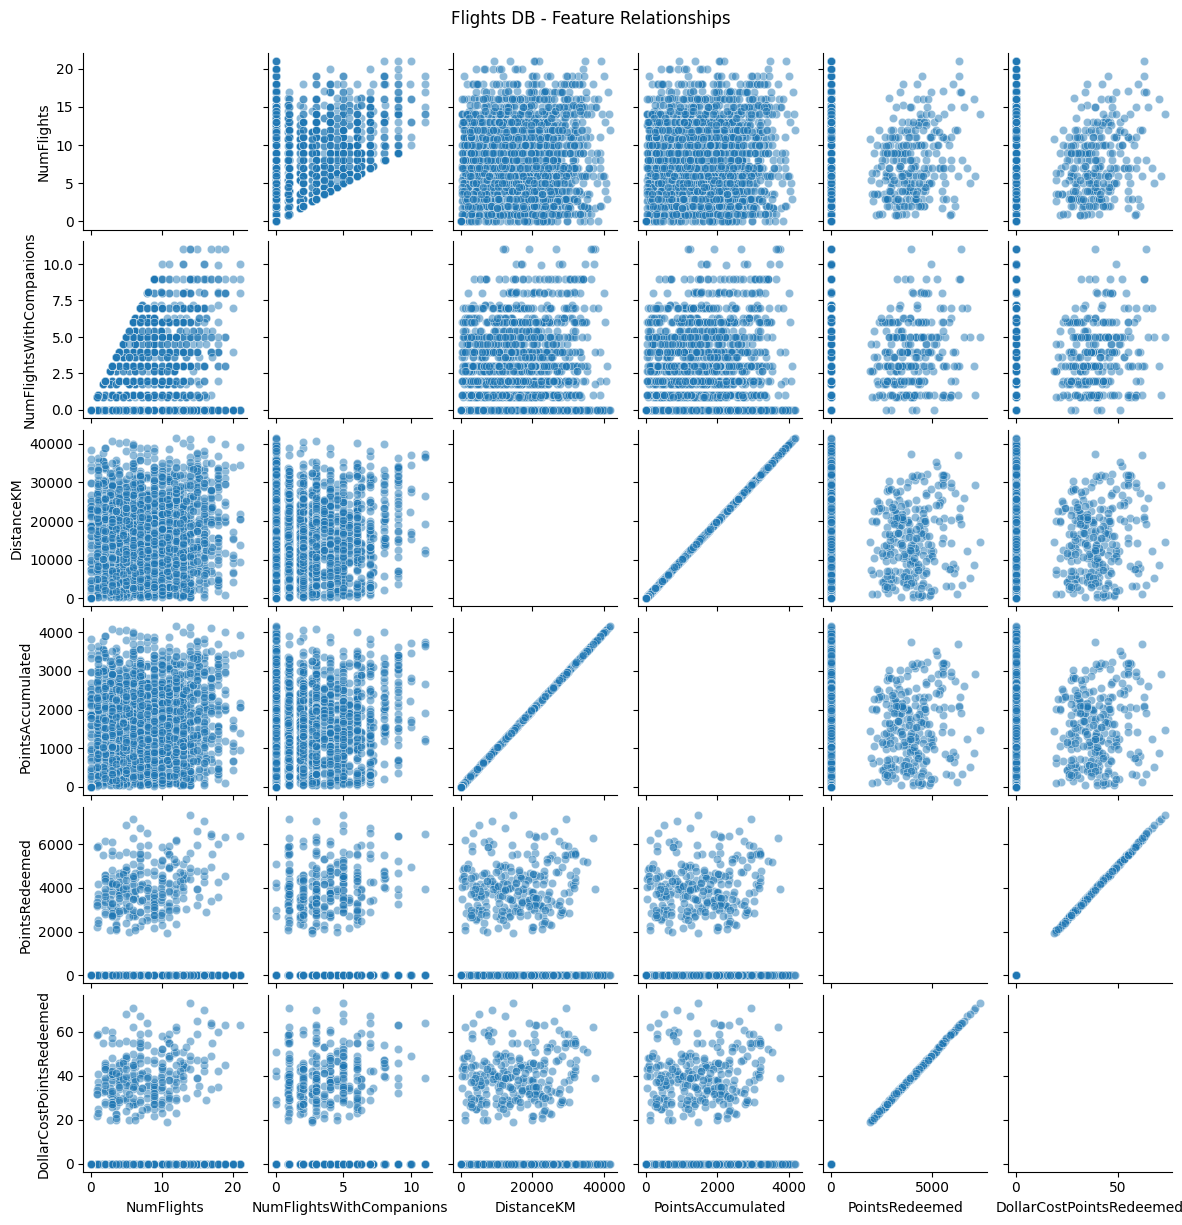

In [18]:
# Flights DB: Pairplot of key features
numeric_features = ["NumFlights", "NumFlightsWithCompanions", "DistanceKM", 
                    "PointsAccumulated", "PointsRedeemed", "DollarCostPointsRedeemed"]

g = sns.pairplot(data=flights_db[numeric_features].sample(5000, random_state=42),
                 diag_kind='scatter', plot_kws={'alpha': 0.5}, height=2)
plt.suptitle('Flights DB - Feature Relationships', y=1.02)
plt.show()

**Pairplot Analysis:** Visualizes relationships between all flight-related features. Strong diagonal patterns indicate perfect correlations (e.g., DistanceKM vs PointsAccumulated), while scattered plots show weak or no relationships (e.g., redemption vs flight activity).

**Key Insights:**
- No clear linear relationship between Income and CLV
- High variance in CLV across all income levels suggests other factors drive customer value
- Strong positive relationships between flight frequency, distance, and points accumulated
- Redemption behavior appears independent of flight activity

## <a id="points-redemption"></a> Points Redemption Analysis

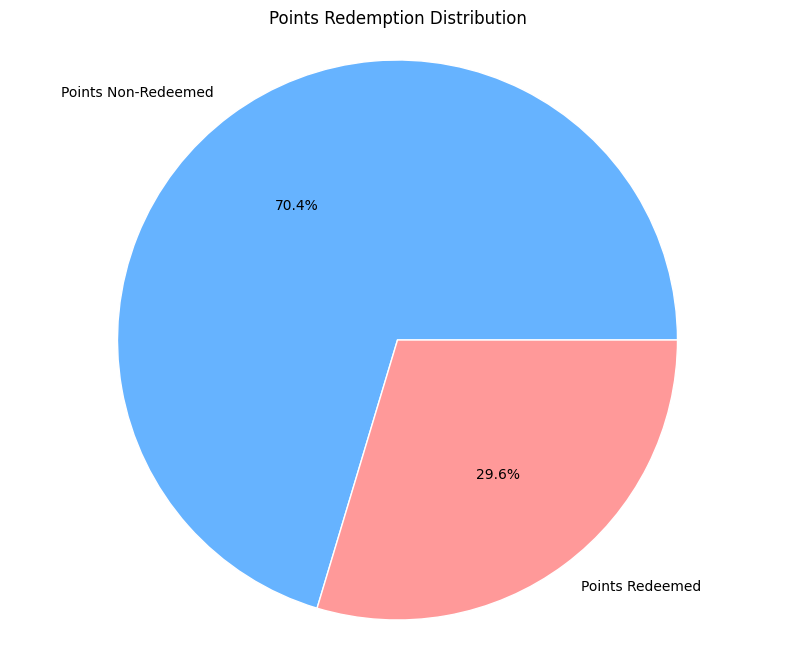

In [19]:
points_accumulated = flights_db['PointsAccumulated'].sum()
points_redeemed = flights_db['PointsRedeemed'].sum()
points_non_redeemed = points_accumulated - points_redeemed

fig, ax = plt.subplots(figsize=(10, 8))
sizes = [points_non_redeemed, points_redeemed]
labels = ['Points Non-Redeemed', 'Points Redeemed']
colors = ['#66b3ff', '#ff9999']

ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
       wedgeprops={"linewidth": 1, "edgecolor": "white"})
plt.title('Points Redemption Distribution')
plt.axis('equal')
plt.show()

**Points Redemption Overview:** Shows the proportion of loyalty points that have been redeemed vs those still available. High unredeemed percentage suggests opportunity for campaigns to increase engagement.

## <a id="geospatial-analysis"></a> Geospatial Analysis

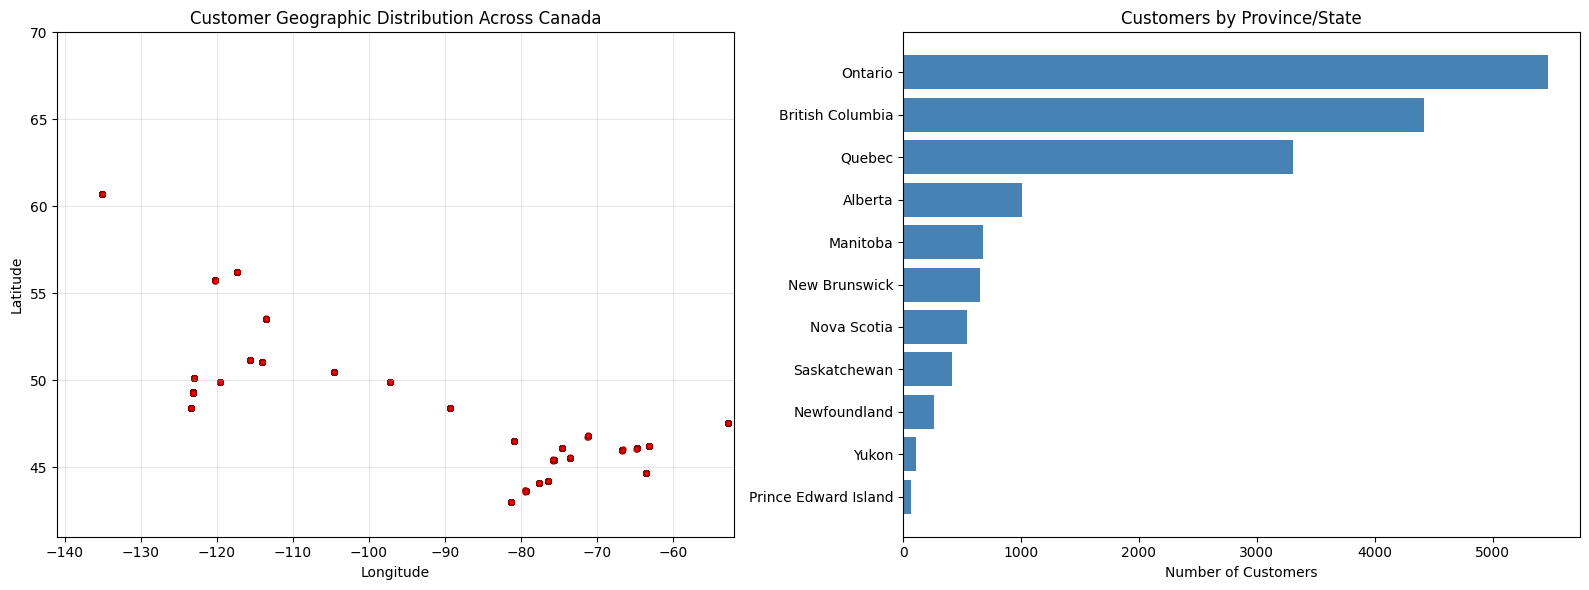

Total unique locations: 49


In [20]:
# Geographic distribution of customers
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot of customer locations with Canada boundaries
axes[0].scatter(customer_db['Longitude'], customer_db['Latitude'], alpha=0.6, s=15, c='red', edgecolor='darkred')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Customer Geographic Distribution Across Canada')
axes[0].set_xlim(-141, -52)  # Canada longitude range
axes[0].set_ylim(41, 70)      # Canada latitude range
axes[0].grid(True, alpha=0.3)

# Province distribution
province_counts = customer_db['Province or State'].value_counts()
axes[1].barh(province_counts.index, province_counts.values, color='steelblue')
axes[1].set_xlabel('Number of Customers')
axes[1].set_title('Customers by Province/State')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print(f"Total unique locations: {customer_db[['Latitude', 'Longitude']].drop_duplicates().shape[0]}")

**Geographic Distribution:** Map shows customer locations concentrated in southern Canada's major urban areas. Eastern provinces (Ontario, Quebec) and western coast (British Columbia) have highest customer density, reflecting population distribution patterns.